# Part 4: XGBoost

### Objective

**Fit Model:** We will forecast the price of municipal green bonds on the "covid", "post_covid", and "full" dataset using *XGBoost*. To select the hyperparameters for our model, we will do time series cross validation on the training set. When doing this time series cross validation, we will when possible test the default hyperparameters against new hyperparameters. Sometimes, documentation on the tree model is not complete, and the exact default hyperparameter is not confidently known. Notice that we use a fixed seed when testing our hyperparameters and fitting our model. 

**Evaluate Forecast:** Once we have trained our model on the 80% of training data, we will test it against the 20% of testing data. We will plot the results of our forecasts for the "covid", "post covid", and "full" data sets. We will display the mean squared error (MSE), $r^2$, root mean squared error (RMSE), mean absolute error (MAE), and mean absolute percentage error (MAPE) of our forecats. 

**Explain Forecast:** Finally, we will use the "shap" package in python to plot various SHAP graphs, which will give us an explanation behind the drivers of our forecasted values over the testing set. 

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import shap
import my_functions
shap.initjs()

## Default Parameters

- n_estimators: 100
- max_depth: 6
- learning_rate: 0.3

## Import Data

In [2]:
# import all data
df_covid = pd.read_excel("./cleaned_excel_data/covid_data.xlsx")
df_post_covid = pd.read_excel("./cleaned_excel_data/post_covid_data.xlsx")
df_full = pd.read_excel("./cleaned_excel_data/full_data.xlsx")

In [3]:
# covid data
X_covid = df_covid.drop(columns=['date', 'mgb_log_diff'])
y_covid = df_covid['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_covid))
X_train_covid, X_test_covid = X_covid[:split_idx], X_covid[split_idx:]
y_train_covid, y_test_covid = y_covid[:split_idx], y_covid[split_idx:]


# post covid data
X_post_covid = df_post_covid.drop(columns=['date', 'mgb_log_diff'])
y_post_covid = df_post_covid['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_post_covid))
X_train_post_covid, X_test_post_covid = X_post_covid[:split_idx], X_post_covid[split_idx:]
y_train_post_covid, y_test_post_covid = y_post_covid[:split_idx], y_post_covid[split_idx:]

# full data
X_full = df_full.drop(columns=['date', 'mgb_log_diff'])
y_full = df_full['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_full))
X_train_full, X_test_full = X_full[:split_idx], X_full[split_idx:]
y_train_full, y_test_full = y_full[:split_idx], y_full[split_idx:]

## Find Optimal Parameters (Time Series Cross Validation)

In [4]:
param_grid = {
    'max_depth': [4,5,6],
    'n_estimators' : [75, 100, 125],
    'learning_rate' : [0.01, 0.02, 0.3],
    'random_state': [1]
}

#### Covid Time Period

In [5]:
best_params_covid, best_mse_covid = my_functions.time_series_cv_tuning_xgboost(X_train_covid, y_train_covid, param_grid, print_results = False)


Testing parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.01, 'random_state': 1}
Avg MSE: 218.5594

Testing parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.02, 'random_state': 1}
Avg MSE: 219.7072

Testing parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.3, 'random_state': 1}
Avg MSE: 419.2132

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.01, 'random_state': 1}
Avg MSE: 217.5464

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.02, 'random_state': 1}
Avg MSE: 220.5000

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.3, 'random_state': 1}
Avg MSE: 422.1559

Testing parameters: {'max_depth': 4, 'n_estimators': 125, 'learning_rate': 0.01, 'random_state': 1}
Avg MSE: 216.9259

Testing parameters: {'max_depth': 4, 'n_estimators': 125, 'learning_rate': 0.02, 'random_state': 1}
Avg MSE: 256.5915

Testing parameters: {'max_depth': 4, 'n_estimators':

#### Post Covid Time Period

In [6]:
best_params_post_covid, best_mse_post_covid = (
    my_functions.time_series_cv_tuning_xgboost(X_train_post_covid, y_train_post_covid, param_grid, print_results = False)
)


Testing parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.01, 'random_state': 1}
Avg MSE: 30.4771

Testing parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.02, 'random_state': 1}
Avg MSE: 30.9439

Testing parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.3, 'random_state': 1}
Avg MSE: 40.6355

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.01, 'random_state': 1}
Avg MSE: 29.9457

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.02, 'random_state': 1}
Avg MSE: 33.1599

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.3, 'random_state': 1}
Avg MSE: 40.6412

Testing parameters: {'max_depth': 4, 'n_estimators': 125, 'learning_rate': 0.01, 'random_state': 1}
Avg MSE: 30.1053

Testing parameters: {'max_depth': 4, 'n_estimators': 125, 'learning_rate': 0.02, 'random_state': 1}
Avg MSE: 35.0704

Testing parameters: {'max_depth': 4, 'n_estimators': 125, 'l

#### Full Time Period

In [7]:
best_params_full, best_mse_full = my_functions.time_series_cv_tuning_xgboost(X_train_full, y_train_full, param_grid, print_results = False)


Testing parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.01, 'random_state': 1}
Avg MSE: 267.4442

Testing parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.02, 'random_state': 1}
Avg MSE: 355.5472

Testing parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.3, 'random_state': 1}
Avg MSE: 648.5057

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.01, 'random_state': 1}
Avg MSE: 342.6460

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.02, 'random_state': 1}
Avg MSE: 386.7024

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.3, 'random_state': 1}
Avg MSE: 647.1746

Testing parameters: {'max_depth': 4, 'n_estimators': 125, 'learning_rate': 0.01, 'random_state': 1}
Avg MSE: 349.4663

Testing parameters: {'max_depth': 4, 'n_estimators': 125, 'learning_rate': 0.02, 'random_state': 1}
Avg MSE: 425.1783

Testing parameters: {'max_depth': 4, 'n_estimators':

## See Quality of Prediction 

We will use the optimal parameters to train the model

#### Covid Time Period

In [8]:
model_xgboost_covid =  xgb.XGBRegressor(objective = 'reg:squarederror', verbosity = 0,  **best_params_covid)
model_xgboost_covid.fit(X_train_covid, y_train_covid)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=125,
             n_jobs=None, num_parallel_tree=None, ...)

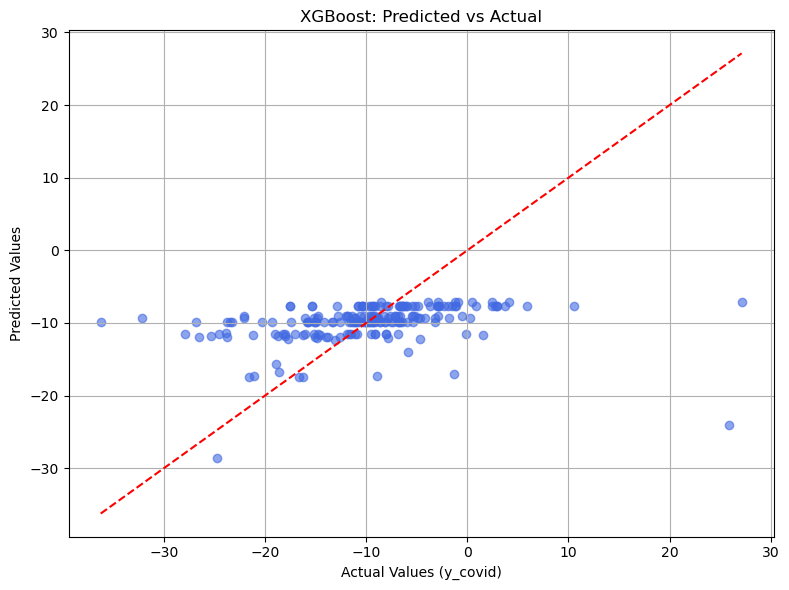

MSE of XGBoost: 60.0546
R squared of XGBoost: 0.0693
RMSE of XGBoost: 7.7495
MAE of XGBoost: 5.0784
MAPE of XGBoost: 1.64%


In [9]:
metrics = my_functions.evaluate_model_performance(model_xgboost_covid, X_test_covid, y_test_covid, 
                                   model_name="XGBoost", target_name="y_covid")

#### Post Covid Time Period

In [10]:
model_xgboost_post_covid = xgb.XGBRegressor(objective = 'reg:squarederror', verbosity = 0, **best_params_post_covid)
model_xgboost_post_covid.fit(X_train_post_covid, y_train_post_covid)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

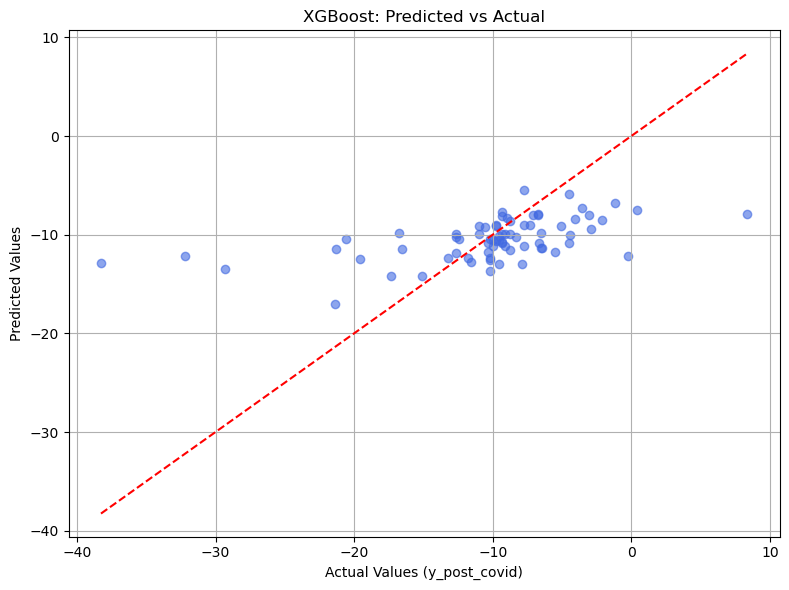

MSE of XGBoost: 36.2397
R squared of XGBoost: 0.2336
RMSE of XGBoost: 6.0199
MAE of XGBoost: 3.8957
MAPE of XGBoost: 1.35%


In [11]:
metrics = my_functions.evaluate_model_performance(model_xgboost_post_covid, X_test_post_covid, y_test_post_covid, 
                                   model_name="XGBoost", target_name="y_post_covid")

#### Full Time Period

In [12]:
model_xgboost_full = xgb.XGBRegressor(objective = 'reg:squarederror', verbosity = 0, **best_params_full)
model_xgboost_full.fit(X_train_full, y_train_full)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=75,
             n_jobs=None, num_parallel_tree=None, ...)

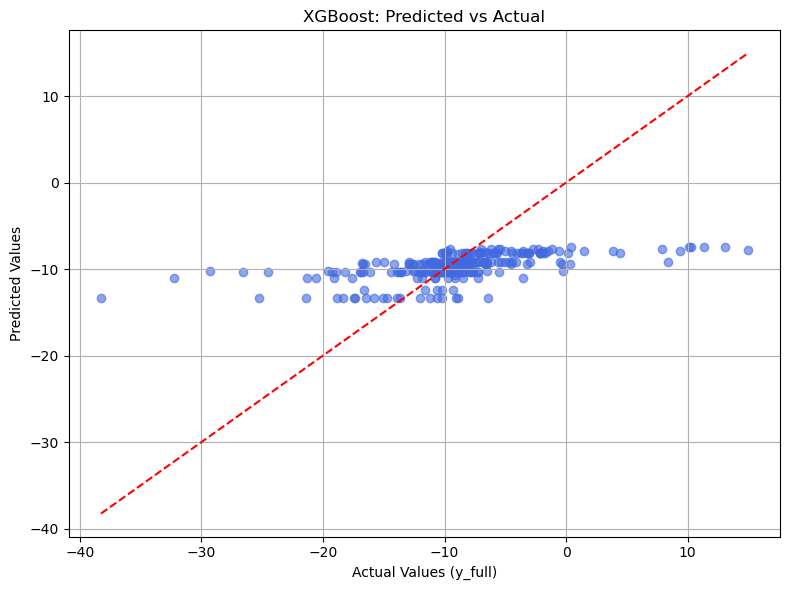

MSE of XGBoost: 30.9919
R squared of XGBoost: 0.2043
RMSE of XGBoost: 5.5670
MAE of XGBoost: 3.5291
MAPE of XGBoost: 1.24%


In [13]:
metrics = my_functions.evaluate_model_performance(model_xgboost_full, X_test_full, y_test_full, 
                                   model_name="XGBoost", target_name="y_full")

## SHAP Plots

We will fit SHAP plots onto the test set.

#### Covid Time Period

1. Beeswarm plot


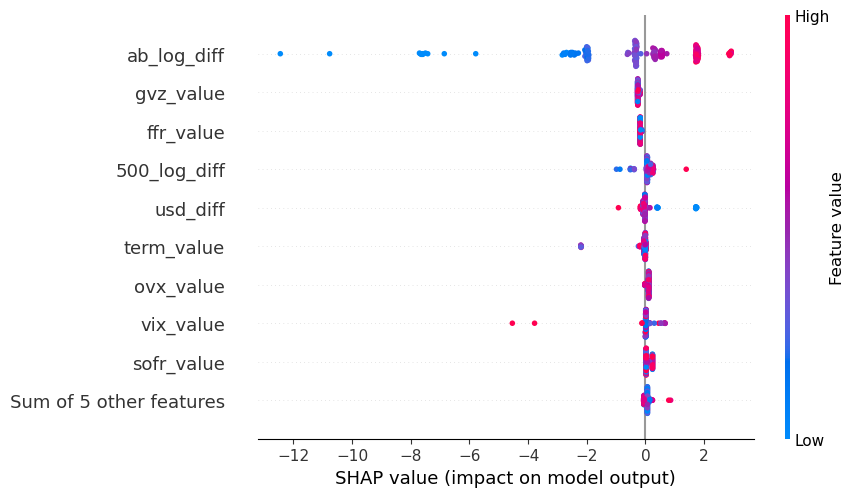

2. Feature importance bar plot


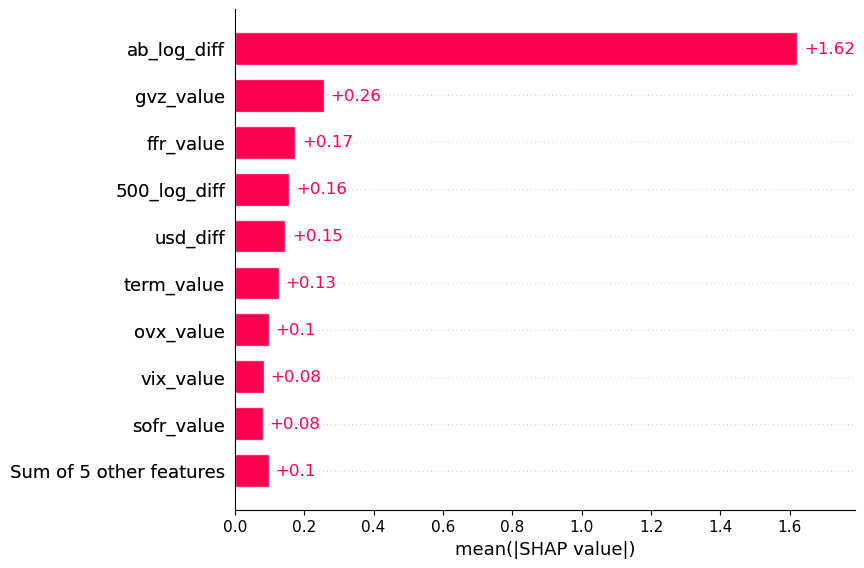

3. Dependence plots grid


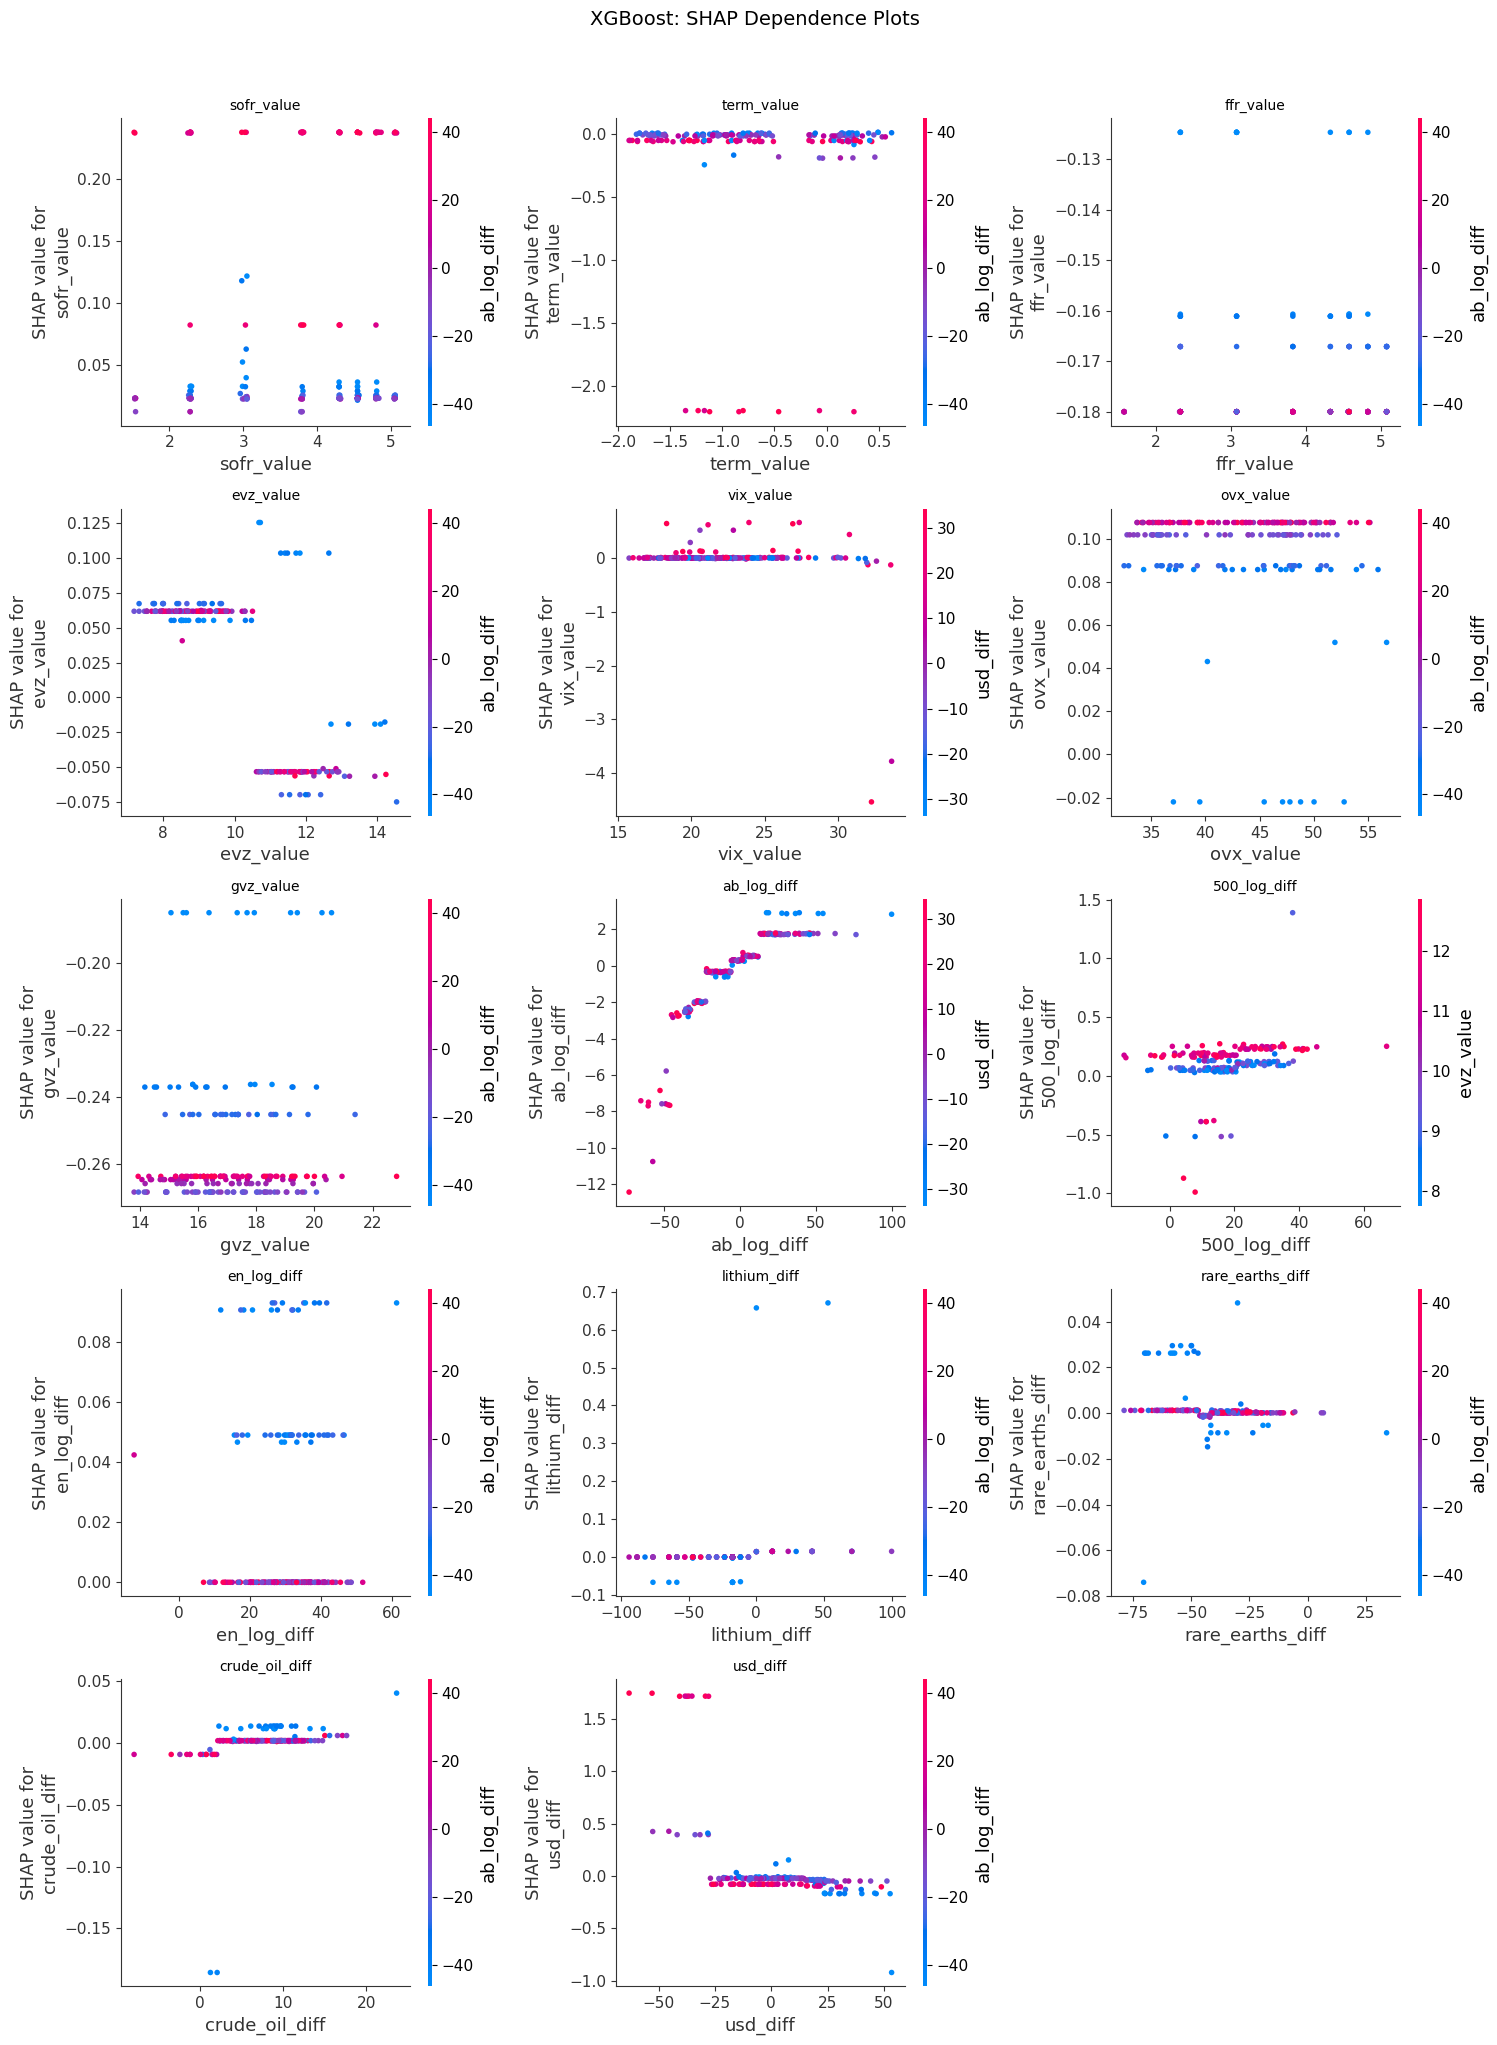

4. Heatmap ordered by predictions


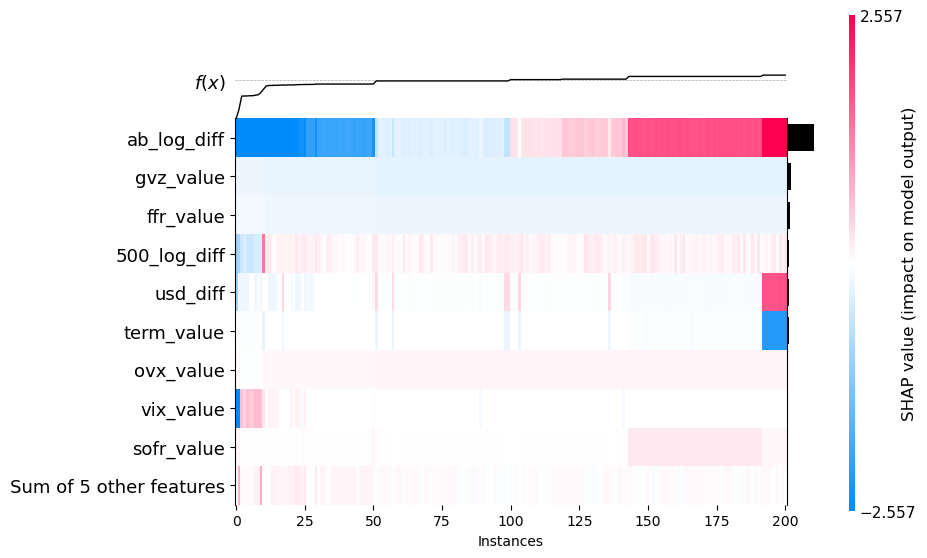

In [14]:
shap_covid = my_functions.shap_analysis_complete(model_xgboost_covid, X_train_covid, X_test_covid, 
                                model_name="XGBoost", n_cols=3)

#### Post Covid Time Period

1. Beeswarm plot


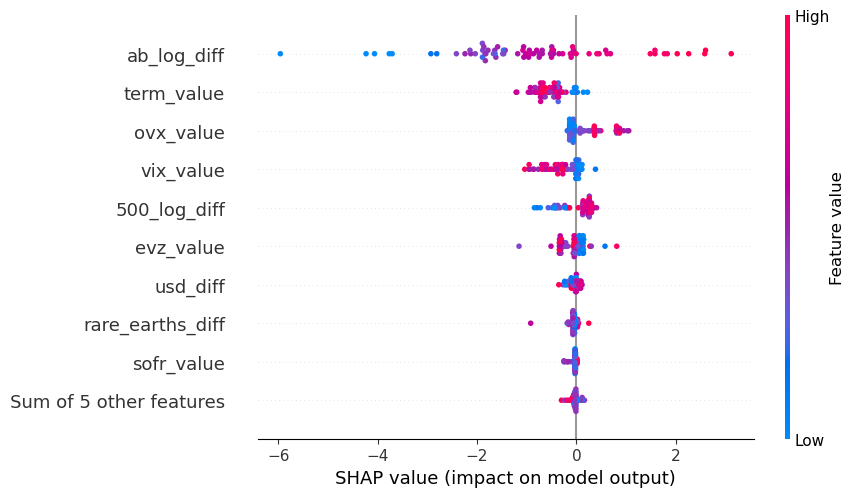

2. Feature importance bar plot


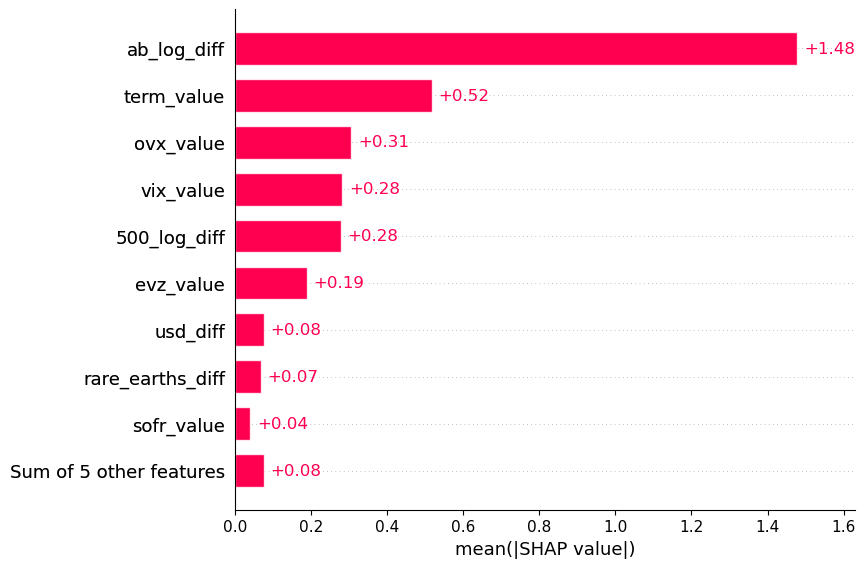

3. Dependence plots grid


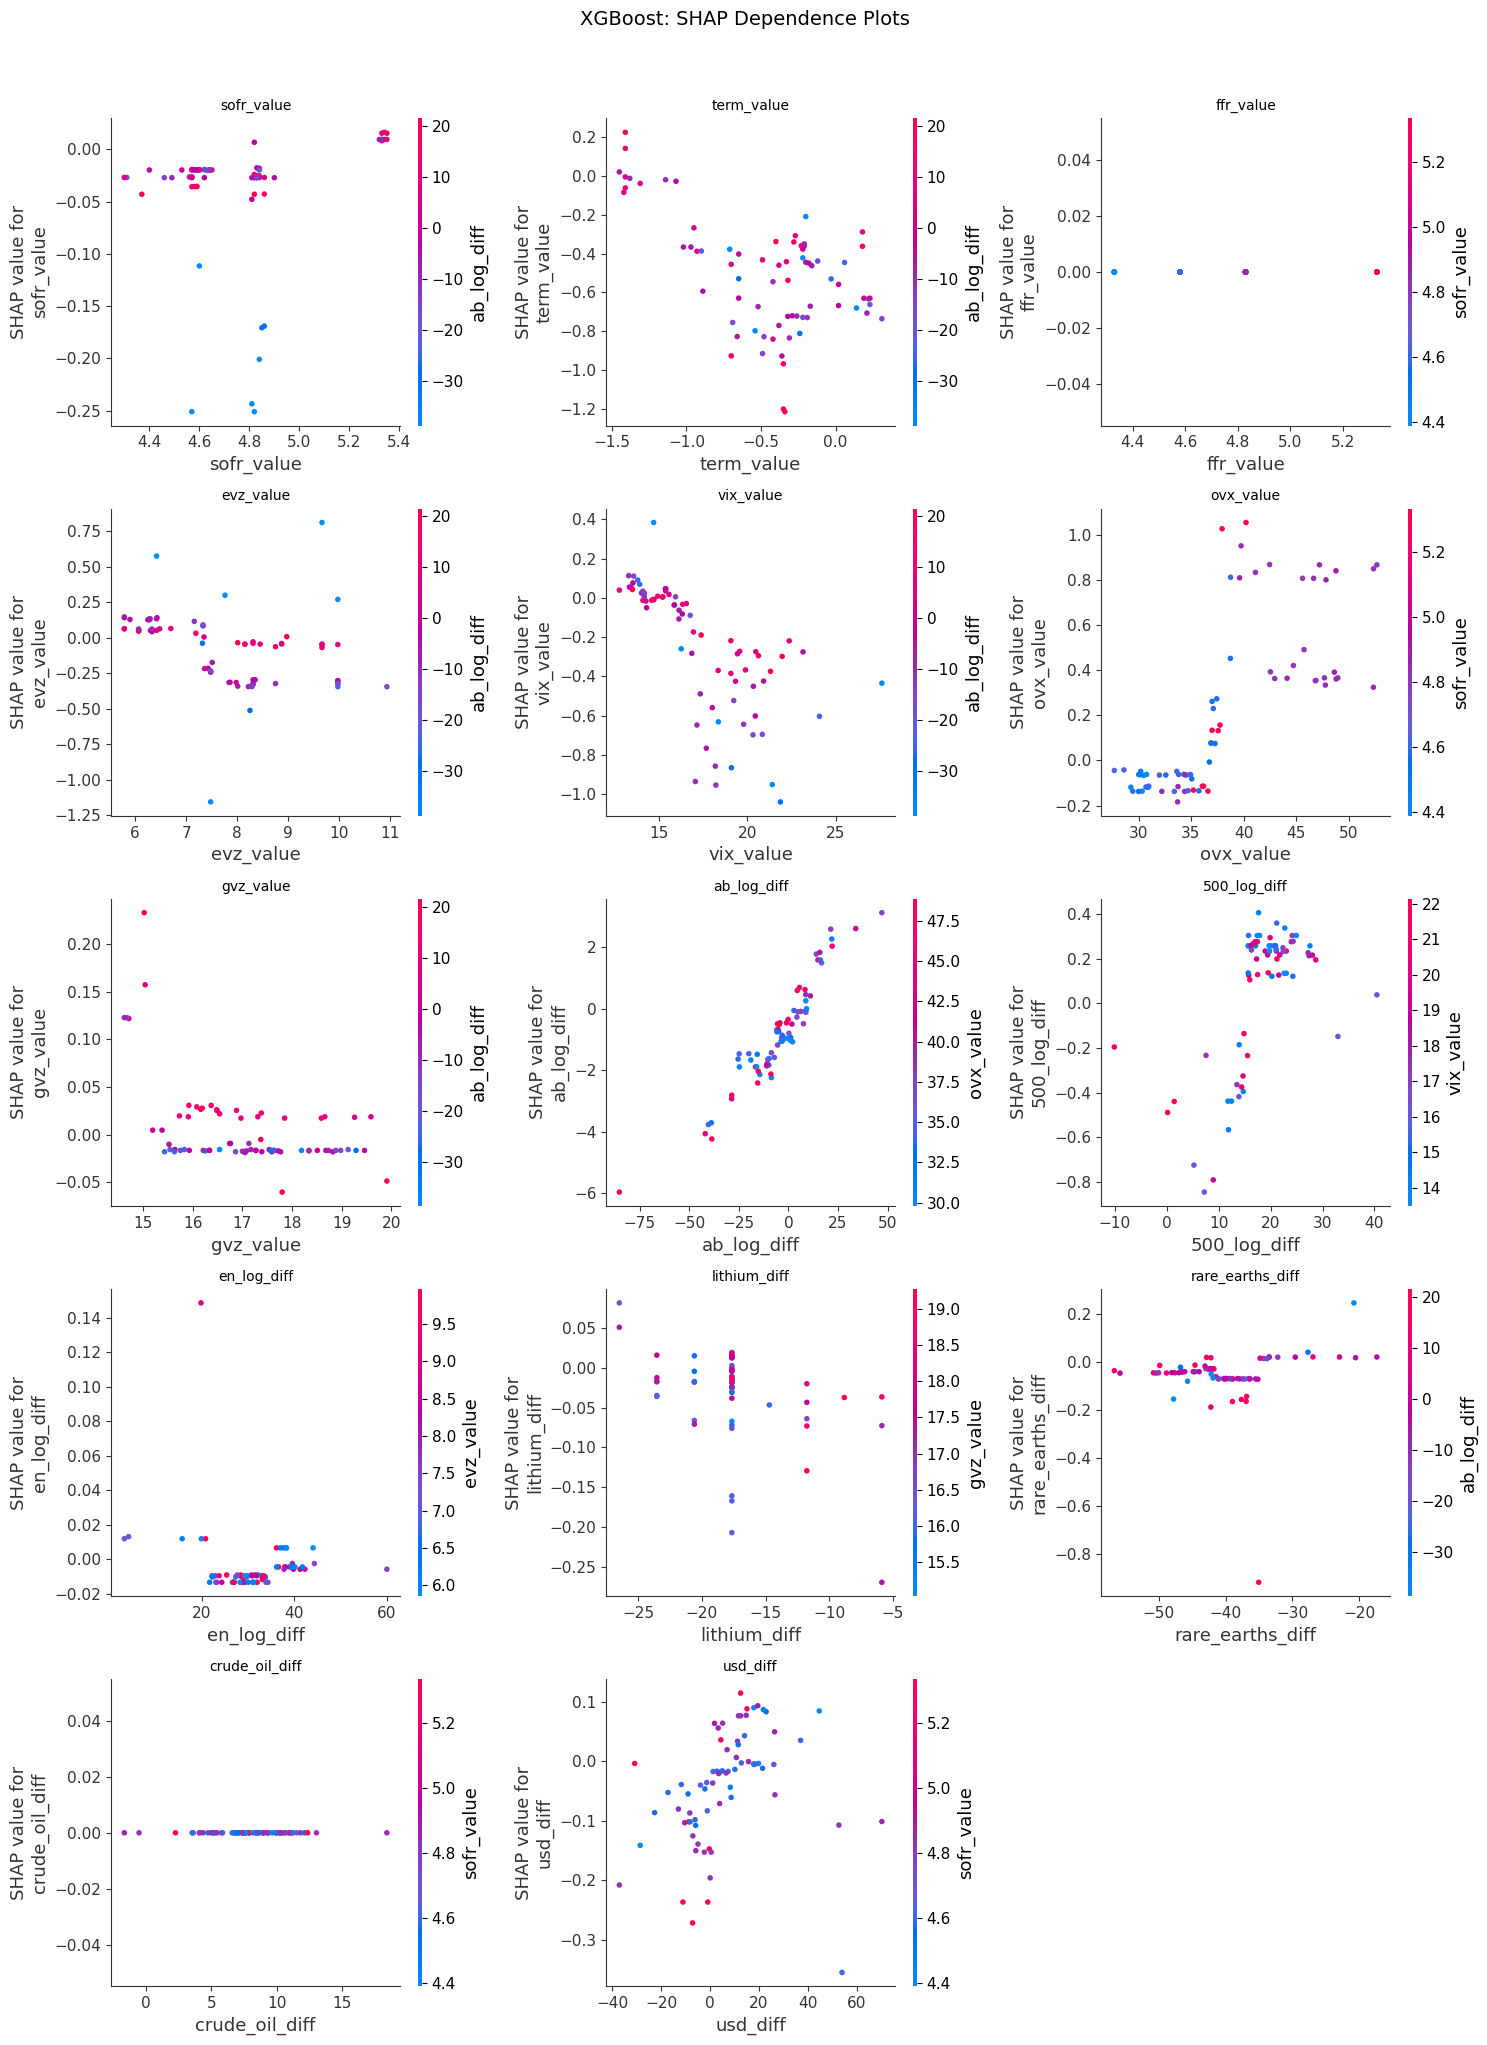

4. Heatmap ordered by predictions


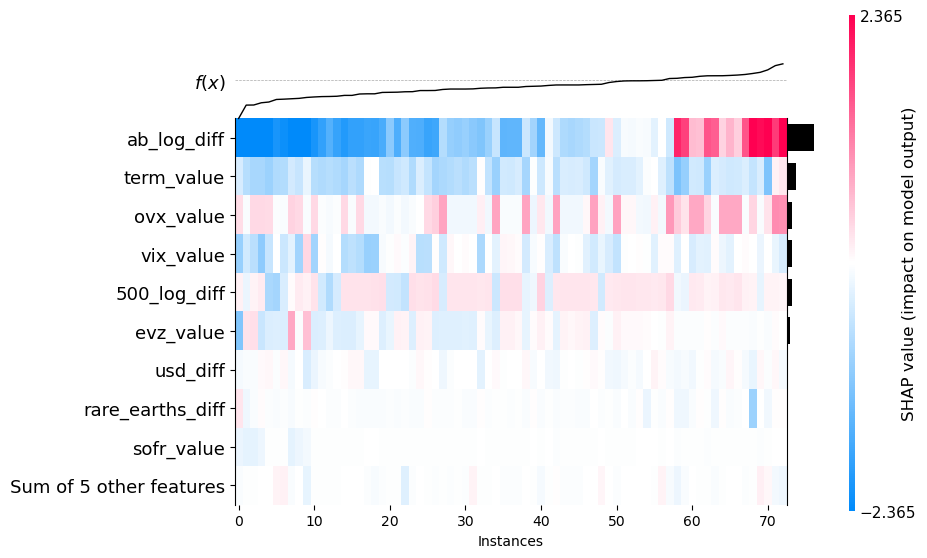

In [15]:
shap_post_covid = my_functions.shap_analysis_complete(model_xgboost_post_covid, X_train_post_covid, X_test_post_covid, 
                                model_name="XGBoost", n_cols=3)

#### Full Time Period

1. Beeswarm plot


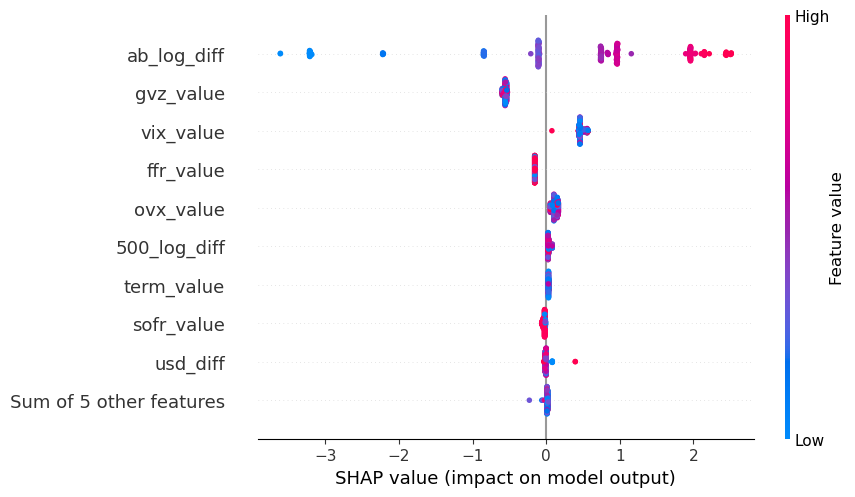

2. Feature importance bar plot


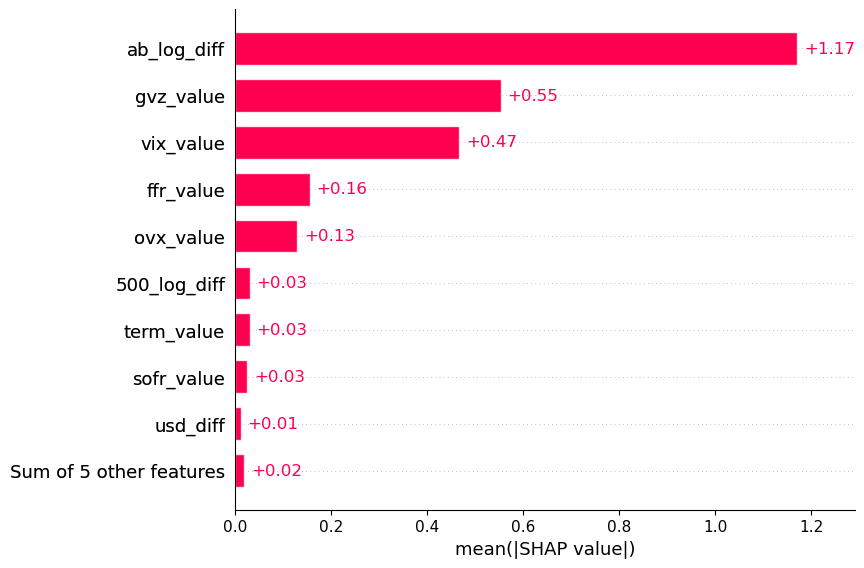

3. Dependence plots grid


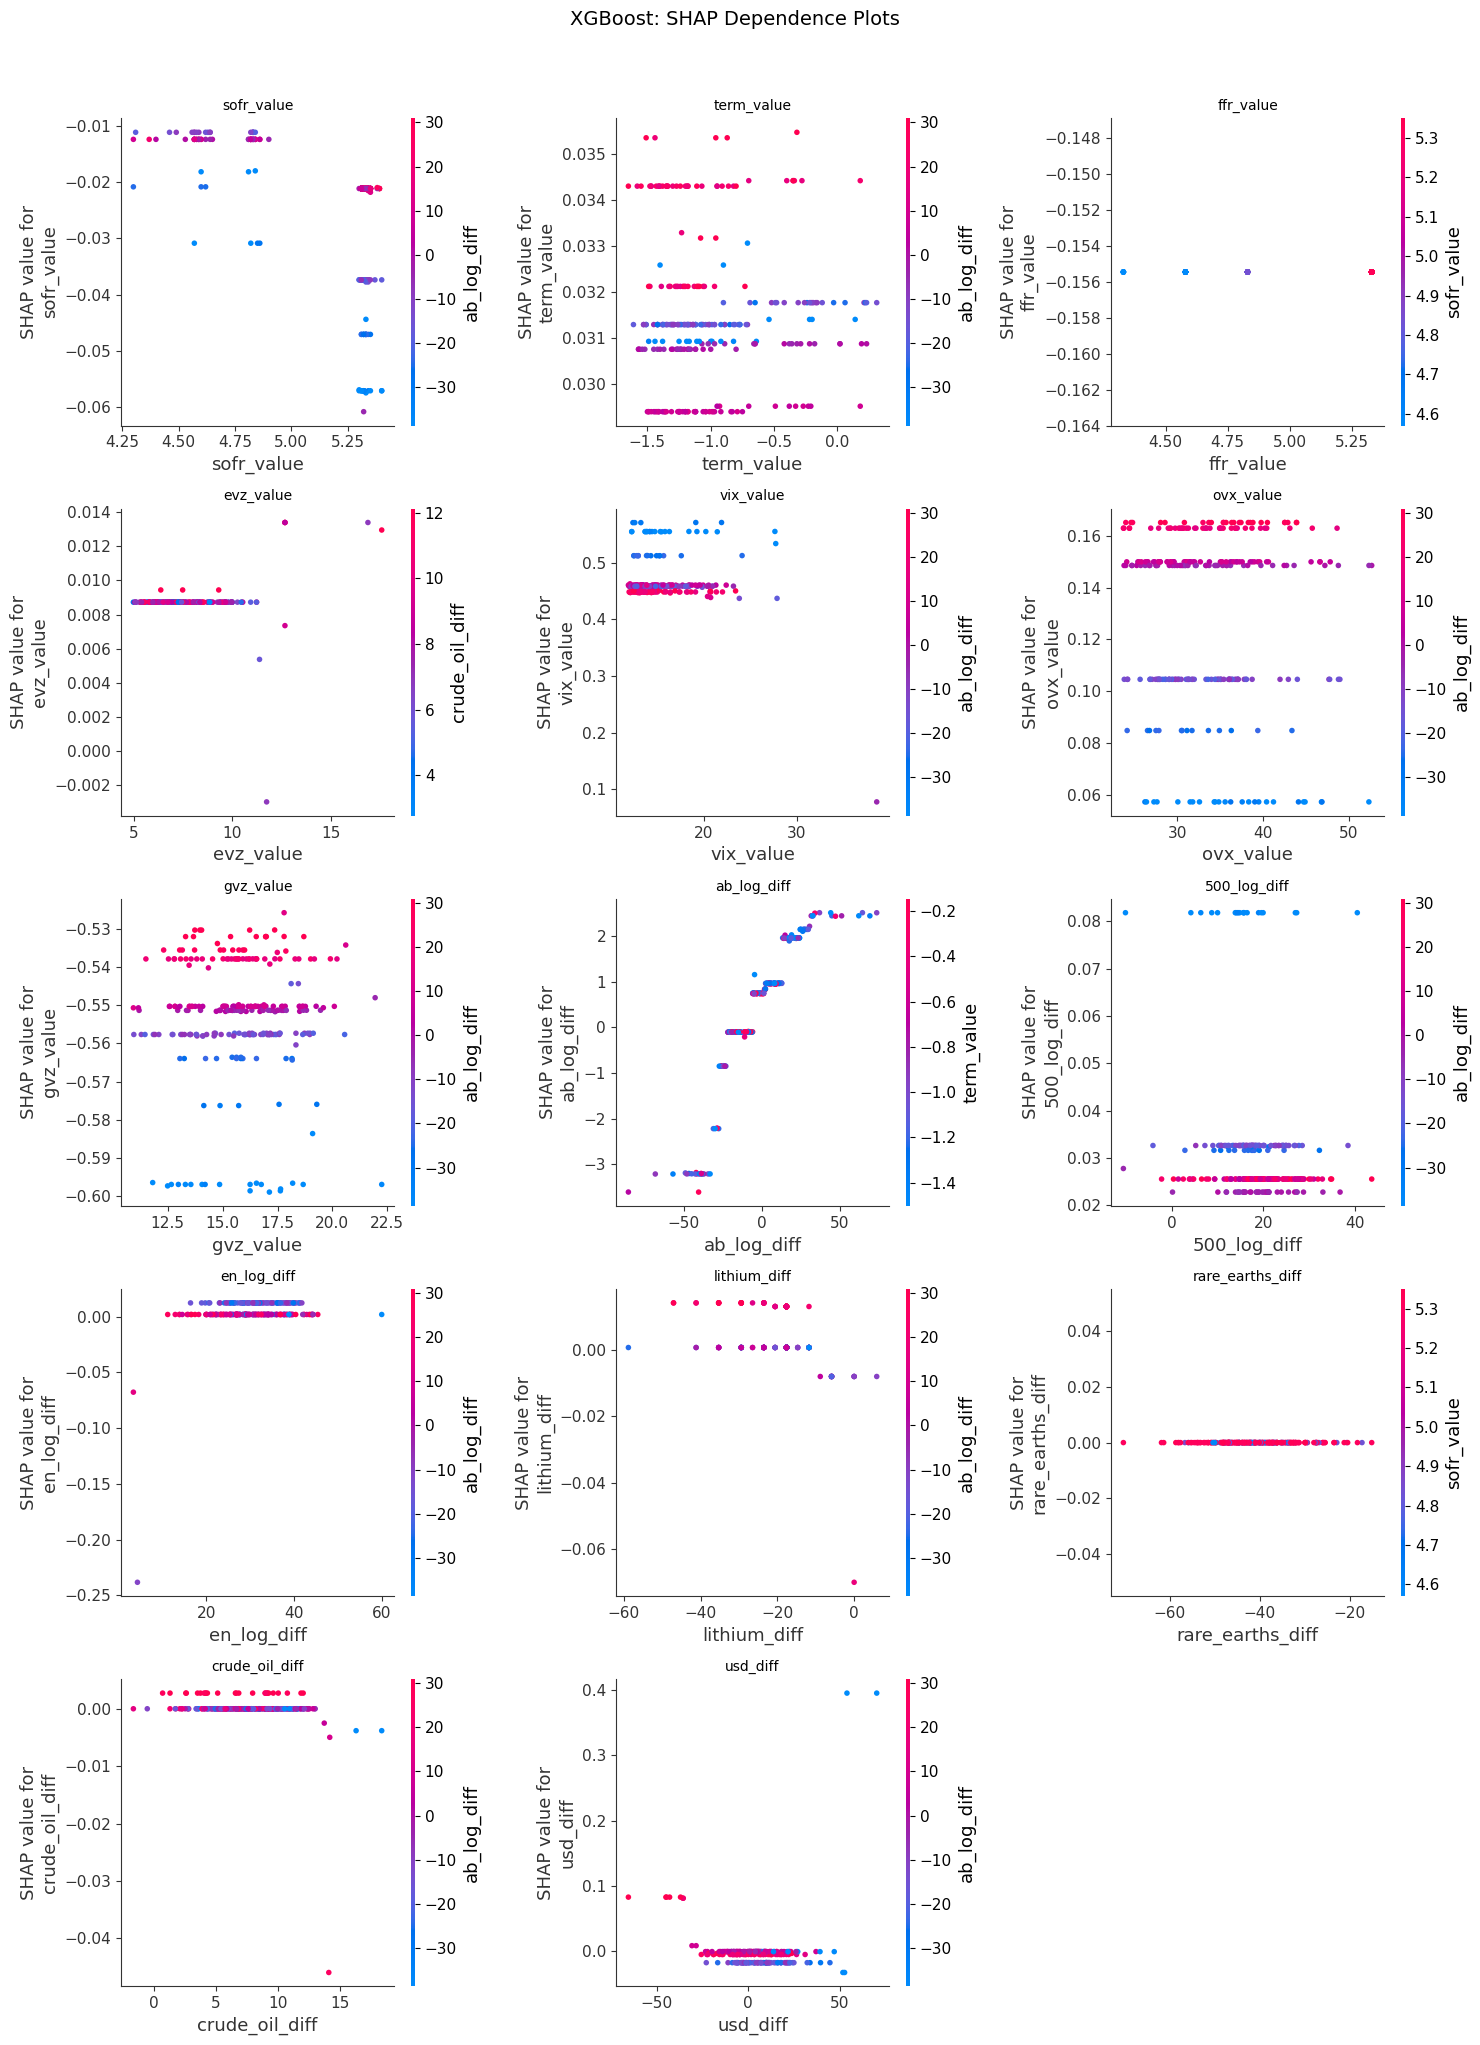

4. Heatmap ordered by predictions


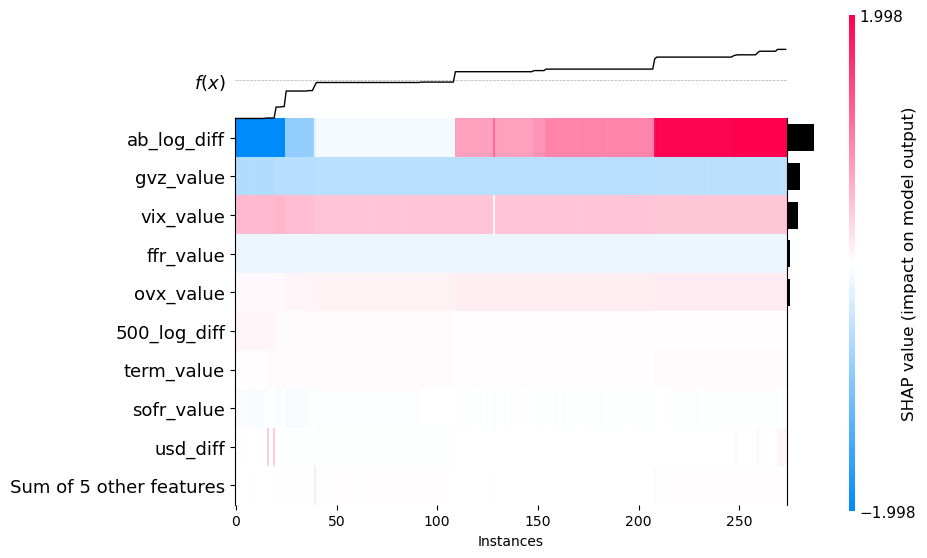

In [16]:
shap_full = my_functions.shap_analysis_complete(model_xgboost_full, X_train_full, X_test_full, 
                                model_name="XGBoost", n_cols=3)